<a href="https://colab.research.google.com/github/taskswithcode/MLIntro/blob/main/EntropyInPhysicsAndInformationTheory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Entropy in Physics & Information Theory**

This is the notebook for the video [Entropy in physics and information theory - demystified](https://youtu.be/F9YkjKoT2lw)

### Toy model to illustrate the difference between entropy in Physics and Information theory


### 1.  Entropy calculation in Information theory

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy
import math


# Function to calculate entropy in information theory
def calculate_entropy(probs):
    entropy = 0
    for p in probs:
        if p > 0:  # Only add term to sum if p > 0
            entropy += p * np.log2(p)
    return -entropy  # Return negative of sum, as per entropy formula

### 2. Initial state where all the molecules are on one side



Text(0.5, 1.0, 'Initial State\nPhysics Entropy = 363.74\nInfo Theory Entropy = -0.00')

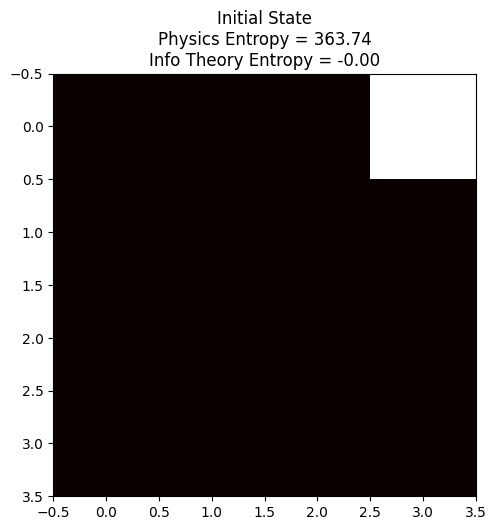

In [ ]:
# Define the chamber
chamber = np.zeros((4, 4))

# Initially, all gas particles are in the top-right square
chamber[0, -1] = 100

# Calculate the initial entropies
#Pyscis entropy formula explained below
initial_entropy_physics = math.log(math.factorial(int(np.sum(chamber))))

#Information theory entropy calculation
initial_probs = chamber.flatten() / np.sum(chamber)
initial_entropy_info_theory = calculate_entropy(initial_probs)

# Plot initial state
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(chamber, cmap='hot', interpolation='nearest')
plt.title(f'Initial State\nPhysics Entropy = {initial_entropy_physics:.2f}\n'
          f'Info Theory Entropy = {initial_entropy_info_theory:.2f}')

In the visualizations, the color represents the concentration of gas particles in each cell of the chamber. The color scheme used here is the "hot" colormap from Matplotlib, which goes from black through red to white.

Darker cells (closer to black) have fewer gas particles. Lighter cells (closer to white) have more gas particles. In the initial state, all the gas particles are concentrated in one cell, so it is the lightest, while all other cells are black. In the final state, the gas particles have dispersed, so the colors are more evenly distributed (below figure), reflecting that the gas particles are more evenly distributed throughout the chamber.

### 2. Dispersed state - molecules are spread out

In [ ]:
# Define how the gas particles disperse in one time step
def disperse(chamber):
    new_chamber = np.zeros((4, 4))
    for i in range(4):
        for j in range(4):
            # Disperse particles to the neighboring squares
            for di, dj in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                if 0 <= i+di < 4 and 0 <= j+dj < 4:
                    new_chamber[i+di, j+dj] += chamber[i, j] / 5
            # Keep some particles in the current square
            new_chamber[i, j] += chamber[i, j] / 5
    return new_chamber

Text(0.5, 1.0, 'Final State\nPhysics Entropy = 51.61\nInfo Theory Entropy = 3.61')

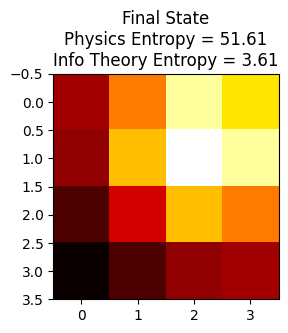

In [ ]:
# Disperse the gas particles over time
for _ in range(5):
    chamber = disperse(chamber)

# Calculate the final entropies
final_entropy_physics = math.log(math.factorial(int(np.sum(chamber))))
final_probs = chamber.flatten() / np.sum(chamber)
final_entropy_info_theory = calculate_entropy(final_probs)

# Plot final state
plt.subplot(122)
plt.imshow(chamber, cmap='hot', interpolation='nearest')
plt.title(f'Final State\nPhysics Entropy = {final_entropy_physics:.2f}\n'
          f'Info Theory Entropy = {final_entropy_info_theory:.2f}')


The visualizations are of the initial and final states of the gas particles in the chamber, along with their corresponding entropy values.

In the visualizations, the color represents the concentration of gas particles in each cell of the chamber. The color scheme used here is the "hot" colormap from Matplotlib, which goes from black through red to white.

Darker cells (closer to black) have fewer gas particles.
Lighter cells (closer to white) have more gas particles.
In the initial state, all the gas particles are concentrated in one cell, so it is the lightest, while all other cells are black. In the final state, the gas particles have dispersed, so the colors are more evenly distributed, reflecting that the gas particles are more evenly distributed throughout the chamber.

In the initial state, all the particles are concentrated in one cell, and in the final state, they are dispersed throughout the chamber.

The entropy in physics decreases from 363.74 to 51.61 as the gas particles disperse, since there are fewer arrangements for the particles when they are dispersed.

The entropy in information theory increases from 0.00 to 3.61 as the gas particles disperse, because the dispersion of particles makes the system less predictable, hence more information is needed to describe the state.

This helps illustrate the contrast between entropy in physics and information theory: in physics, entropy decreases as a system becomes more uniform, whereas in information theory, entropy increases as a system becomes less predictable.



### Explanation of the Physics calculation of entropy used above

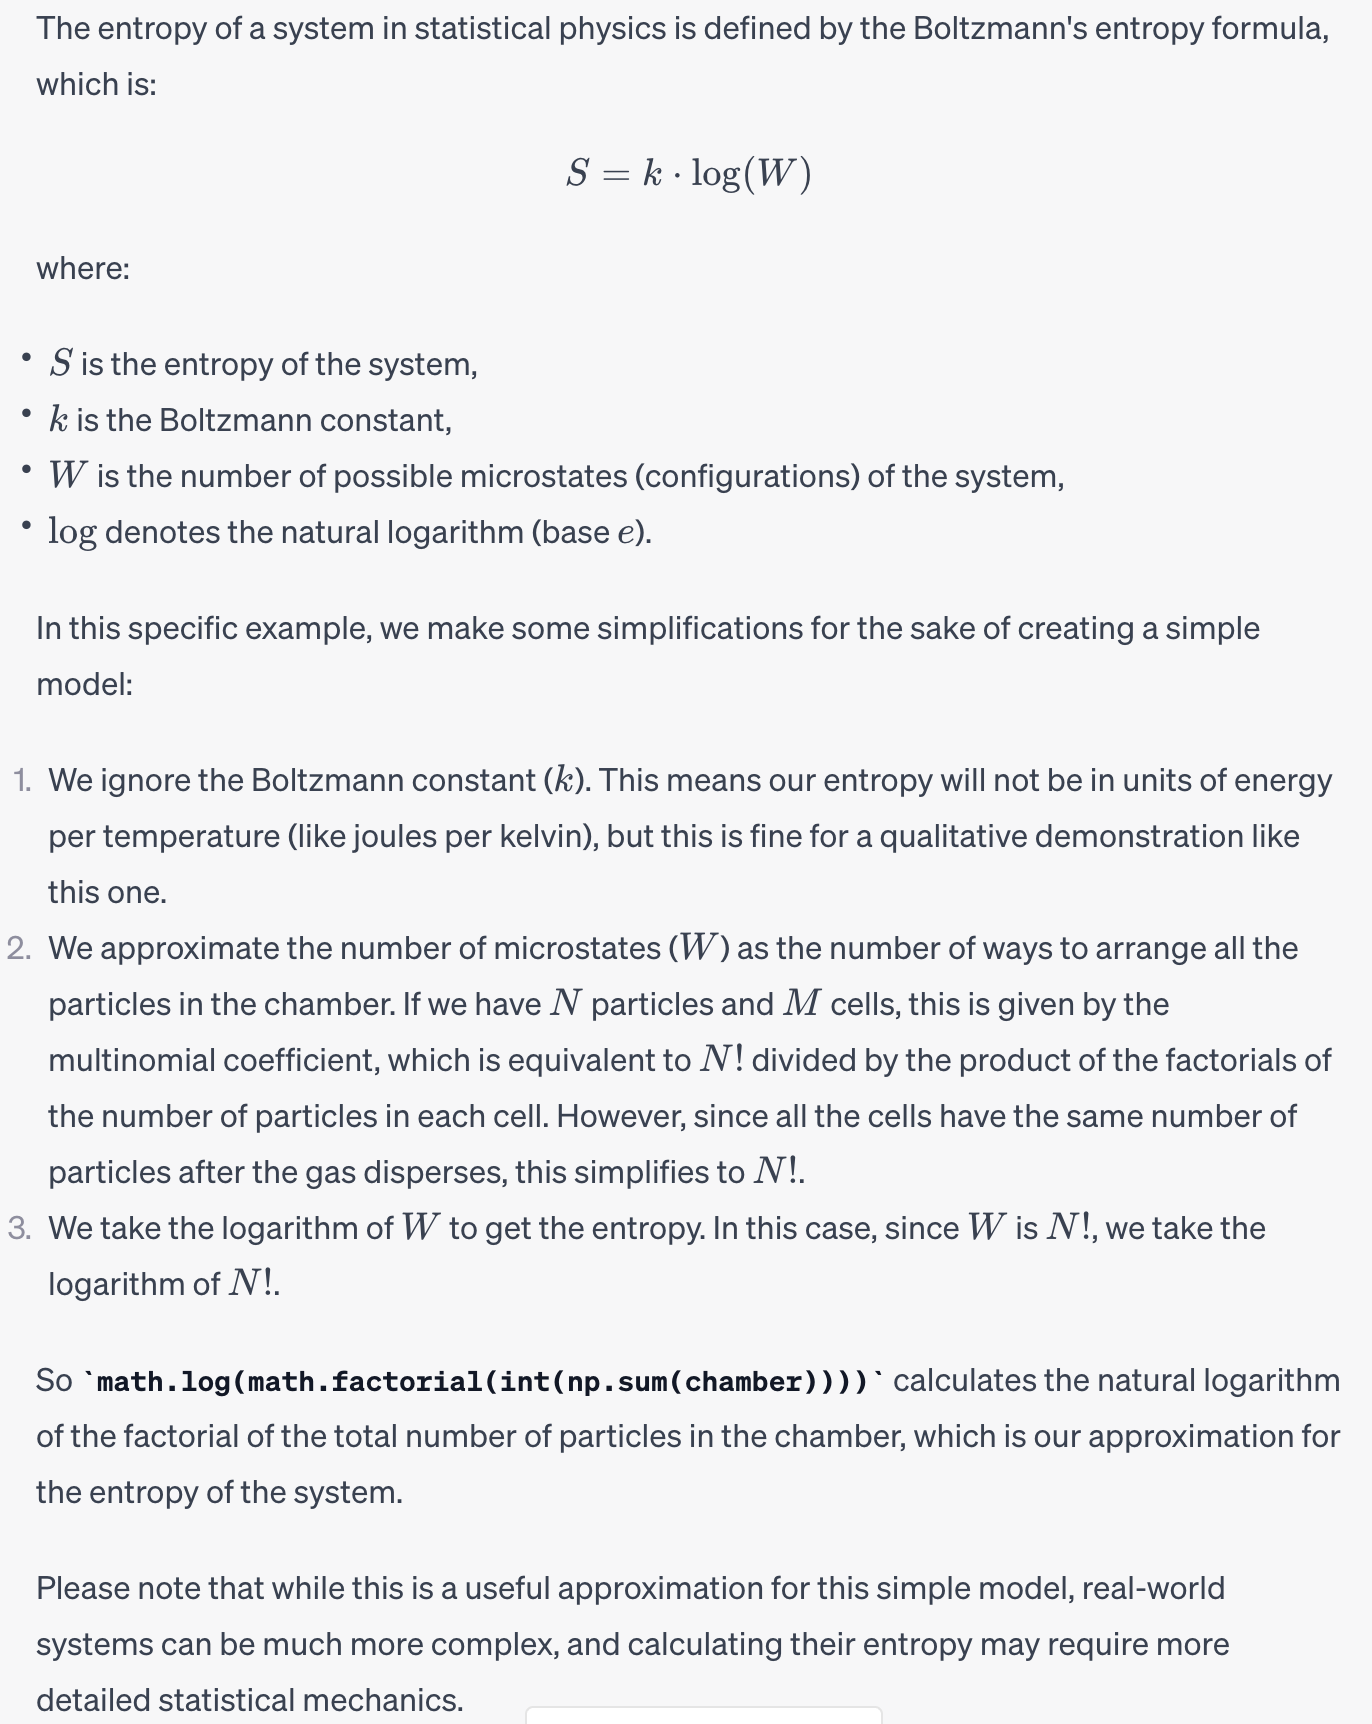

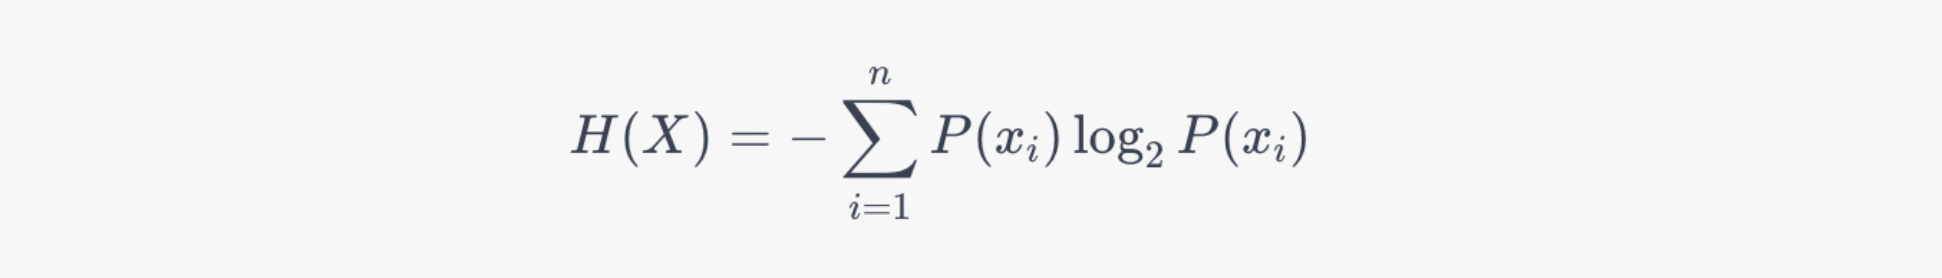